# Car accident severity prediction
I analyzed a data set that contained information about accidents in the US. The name of the dataset is 
'US_Accidents_Dec21_updated.csv'.
## Description of the dataset
### Features
| Feature | Description |
| ------- | ----------- |
| ID | This is a unique identifier of the accident record. |
| Start_Time | Shows the start time of the accident in the local time zone. |
| End_Time | Shows the end time of the accident in the local time zone. |
| Start_Lat | Shows latitude in the GPS coordinate of the start point. |
| Start_Lng | Shows longitude in GPS coordinate of the start point. |
| End_Lat | Shows latitude in GPS coordinate of the endpoint |
| End_Lng | Shows longitude in GPS coordinate of the endpoint. |
| Distance(mi) | The extent of the road affected by the accident. |
| Description | Shows natural language description of the accident. |
| Number | Shows the street number in the address field. |
| Street | Shows the street name in the address field. |
| Side | Shows the relative side of the street (Right/Left) in the address field. |
| City | Shows the city in the address field. |
| County | Shows the county in the address field. |
| State | Shows the state in the address field. |
| Zipcode | Shows the zipcode in the address field. |
| Country | Shows the country in the address field. |
| Timezone | Shows timezone based on the location of the accident (eastern, central, etc.). |
| Airport_Code | Denotes an airport-based weather station, which is the closest one to the location of the accident. |
| Weather_Timestamp | Shows the time-stamp of the weather observation record (in local time). |
| Temperature(F) | Shows the temperature (in Fahrenheit). |
| Wind_Chill(F) | Shows the wind chill (in Fahrenheit). |
| Humidity(%) | Shows the humidity (in percentage). |
| Pressure(in) | Shows the air pressure (in inches). |
| Visibility(mi) | Shows visibility (in miles). |
| Wind_Direction | Shows wind direction. |
| Wind_Speed(mph) | Shows wind speed (in miles per hour). |
| Precipitation(in) | Shows precipitation amount in inches, if there is any. |
| Weather_Condition | Shows the weather conditions (rain, snow, thunderstorm, fog, etc.). |
| Amenity | A Point-Of-Interest (POI) annotation that indicates the presence of an amenity in a nearby location. |
| Bump | A POI annotation which indicates the presence of a speed bump or hump in a nearby location. |
| Crossing | A POI annotation that indicates the presence of a crossing in a nearby location. |
| Give_Way | A POI annotation which indicates the presence of a give_way sign in a nearby location. |
| Junction | A POI annotation that indicates the presence of a junction in a nearby location. |
| No_Exit | A POI annotation which indicates the presence of a no_exit sign in a nearby location. |
| Railway | A POI annotation that indicates the presence of a railway in a nearby location. |
| Roundabout | A POI annotation which indicates the presence of a roundabout in a nearby location. |
| Station | A POI annotation that indicates the presence of a station (bus, train, etc.) in a nearby location. |
| Stop | A POI annotation that indicates the presence of a stop sign in a nearby location. |
| Traffic_Calming | A POI annotation that indicates the presence of traffic_calming means in a nearby location. |
| Traffic_Signal | A POI annotation which indicates presence of traffic_signal in a nearby location. |
| Turning_Loop | A POI annotation which indicates presence of turning_loop in a nearby location. |
| Sunrise_Sunset | Shows the period of day (i.e. day or night) based on sunrise/sunset. |
| Civil_Twilight | Shows the period of day (i.e. day or night) based on civil twilight. |
| Nautical_Twilight | Shows the period of day (i.e. day or night) based on nautical twilight. |
| Astronomical_Twilight | Shows the period of day (i.e. day or night) based on astronomical twilight. |
### Target
| Target | Description |
| ------- | ----------- |
| Severity | Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). |
## Goal and methods
The goal is to predict the "Severity" of the accident. I used classification algorithms, such as a decision tree classifier, artificial neural network, SVM, and logistic regression. These algorithms have a generalization for multiclass tasks. 
This data set contains categorical, numerical, and boolean(can be considered categorical) features.

## Load packeges

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from autocorrect import Speller
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from tensorflow import keras
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In the first step, I'll load the data and check how many missing values exist for each feature.

In [2]:
os.chdir(r'C:\Users\USER\OneDrive\Desktop\Car accident severity prediction')
# Load the data into a pandas DataFrame
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

Next, I print the info on the dataframe. The features with a Dtype object and bool are considered categorial, and the others numerical.

In [2]:
# print the dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

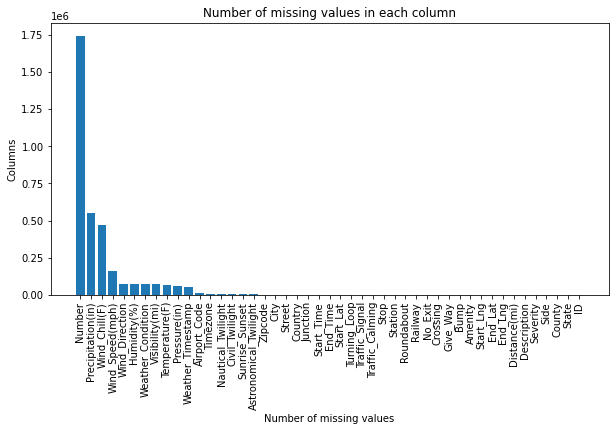

In [2]:
# find the number of missing values present in each column
missing_values = df.isnull().sum()

# sort the missing values in descending order
missing_values_sorted = missing_values.sort_values(ascending=False)

# plot the missing values as a horizontal bar plot
plt.figure(figsize=(10,5))
plt.bar(missing_values_sorted.index, missing_values_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Number of missing values')
plt.ylabel('Columns')
plt.title('Number of missing values in each column')
plt.show()

One can see no missing target ("Severity") labels.

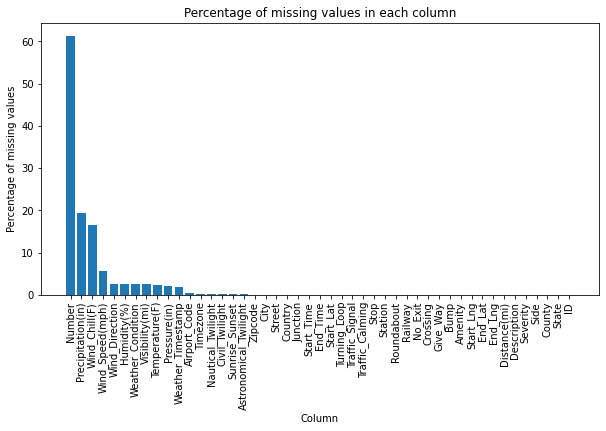

In [3]:
# calculate the percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# sort the missing values in descending order
missing_values_sorted = missing_values.sort_values(ascending=False)

# plot the missing values as a bar plot
plt.figure(figsize=(10,5))
plt.bar(missing_values_sorted.index, missing_values_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each column')
plt.show()

I will drop the features: 'ID,' 'Description,' and 'Country' because each accident's ID is unique and does not affect the analysis. The 'Description' is also unique, so I'll drop him for similar reasons. 'Country' has the same value for all the rows. In addition, I'll remove the features "Number", "Street," and "Zipcode" since the features "Country", "State," and "City" capture the information about the location, and these features are too specific and have a lot of unique values. Also, for similar reasons, I'll remove "Weather_Timestamp."

In [4]:
# Select only categorical columns from the DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Count unique values in each categorical column
rows = []
for col in categorical_cols:
    row = [col, df[col].nunique()]
    rows.append(row)

# print the results as a table
headers = ['Column', 'Unique Values']
table = tabulate(rows, headers=headers)
print(table)

Column                   Unique Values
---------------------  ---------------
ID                             2845342
Start_Time                     1959333
End_Time                       2351505
Description                    1174563
Street                          159651
Side                                 3
City                             11681
County                            1707
State                               49
Zipcode                         363085
Country                              1
Timezone                             4
Airport_Code                      2004
Weather_Timestamp               474214
Wind_Direction                      24
Weather_Condition                  127
Sunrise_Sunset                       2
Civil_Twilight                       2
Nautical_Twilight                    2
Astronomical_Twilight                2


In [5]:
df.drop(['ID', 'Description', 'Country', 'Number',
         'Street', 'Zipcode', 'Weather_Timestamp'], axis=1, inplace=True)
# remove rows with missing values
df.dropna(inplace=True)

In [7]:
# print the shape of the dataframe
print(df.shape)

(2207326, 40)


In the next step, I'll search for outliers in my data set for the numerical features. I use a boxplot and a z-score function to identify outliers with a confidence level of 3 or higher. After this, I removed the outliers that were 100% wrong (after I checked about min/max optional values). I did not remove all the outliers because this dataset looks accurate, and the number of outliers is very small compared to the dataset size. 

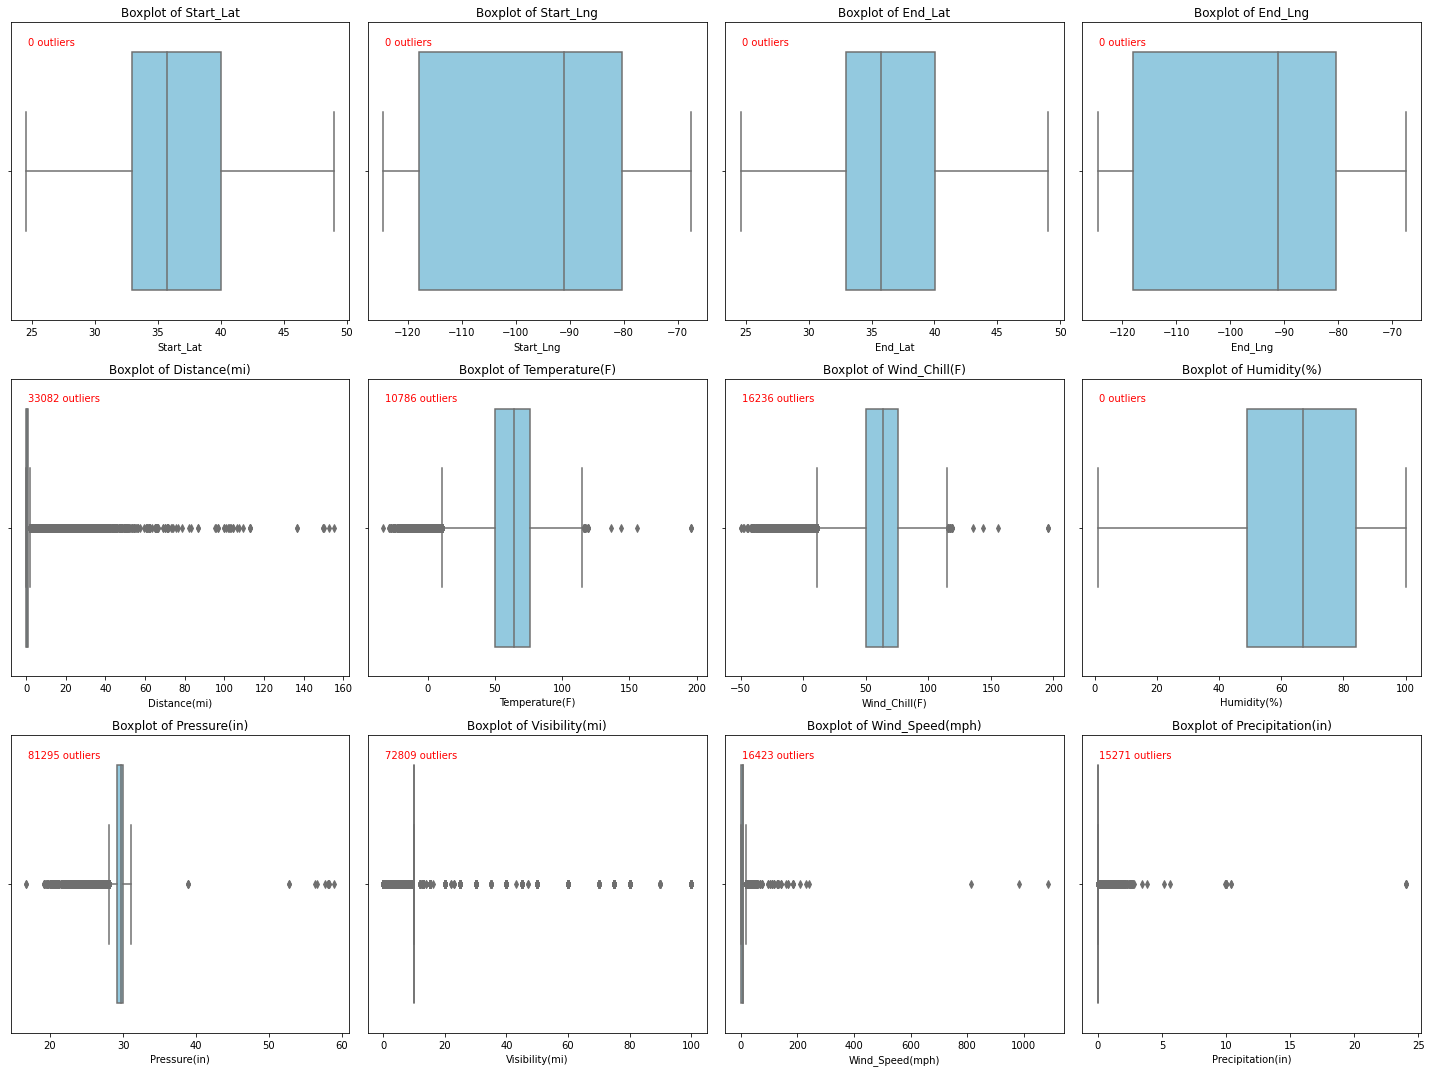

In [6]:
# Define a function to calculate z-score
def get_z_score(col):
    return np.abs((col - col.mean()) / col.std())

# Create a new dataframe containing only the numerical features
num_df = df.select_dtypes(include=['float64', 'int64'])
num_df = num_df.drop('Severity', axis=1) # exclude the 'Severity'

# Create a boxplot for each numerical feature and highlight the outliers using z-score
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

for ax, col in zip(axs.flatten(), num_df.columns):
    z_score = get_z_score(num_df[col])
    outliers = z_score > 3
    
    sns.boxplot(x=num_df[col], ax=ax, color='skyblue')
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.annotate(f"{sum(outliers)} outliers"
                , xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                color='red')
    
plt.tight_layout()
plt.show()

# Remove outliers that are surly a mistake
df = df[df['Temperature(F)'] <= 130]
df = df[df['Wind_Chill(F)'] <= 130]
df = df[df['Pressure(in)'] <= 32]
df = df[df['Pressure(in)'] >= -25]
df = df[df['Wind_Speed(mph)'] <= 250]

Now, I'll search for mistakes using value_counts. This dataset was correct without inconsistency or spelling mistakes. The more accurate method is to check spelling mistakes using Python packages. I have added an example below for the feature 'Weather_Condition'. I have not used it because it's slow.

In [8]:
for column in df.columns:
    print(df[column].value_counts())

In [ ]:
# create an instance of the Speller class
spell = Speller(lang='en')

# apply the spell checker to the 'text' column of the DataFrame
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: spell(x))

# display the corrected DataFrame
print(df)

Here I show a table of the boolean features.

In [9]:
# Select boolean columns from the DataFrame
bool_cols = df.select_dtypes(include=['bool'])

# Create a new DataFrame with the counts of unique values
bool_counts = pd.DataFrame(columns=['Column', 'Unique Values', 'Count of True'
                                    , 'Count of False'])
for col in bool_cols:
    unique_vals = df[col].unique()
    if True in unique_vals:
        bool_counts = bool_counts.append({'Column': col,
                                          'Unique Values': df[col].nunique(),
                            'Count of True': df[col].value_counts()[True],
                            'Count of False': df[col].value_counts()[False]},
                                         ignore_index=True)
    else:
        bool_counts = bool_counts.append({'Column': col,
                            'Unique Values': df[col].nunique(),
                            'Count of True': 0,
                            'Count of False': df[col].value_counts()[False]},
                                         ignore_index=True)

# Format the output as a table
bool_counts.style.hide_index()

Column,Unique Values,Count of True,Count of False
Amenity,2,23464,2183839
Bump,2,908,2206395
Crossing,2,170606,2036697
Give_Way,2,5318,2201985
Junction,2,183444,2023859
No_Exit,2,3577,2203726
Railway,2,17898,2189405
Roundabout,2,101,2207202
Station,2,59373,2147930
Stop,2,42967,2164336


One can see that "Turning_Loop" has only one unique value, so that I can remove this feature.

In [10]:
df = df.drop('Turning_Loop', axis=1)

Here I split the 'Start_Time' and 'End_Time' features into more spesific features.

In [11]:
# convert the "Start_Time" and "End_Time" features to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# extract the month, year, day, hour, and minute of the accident start and 
#end times
df['Start_Month'] = df['Start_Time'].dt.month
df['Start_Year'] = df['Start_Time'].dt.year
df['Start_Day'] = df['Start_Time'].dt.day
df['Start_Hour'] = df['Start_Time'].dt.hour
df['Start_Minute'] = df['Start_Time'].dt.minute

df['End_Month'] = df['End_Time'].dt.month
df['End_Year'] = df['End_Time'].dt.year
df['End_Day'] = df['End_Time'].dt.day
df['End_Hour'] = df['End_Time'].dt.hour
df['End_Minute'] = df['End_Time'].dt.minute

# print the first 5 rows of the dataset with the new features
print(df[['Start_Time', 'End_Time', 'Start_Month', 'Start_Year', 'Start_Day',
          'Start_Hour', 'Start_Minute', 'End_Month', 'End_Year', 'End_Day',
          'End_Hour', 'End_Minute']].head())

            Start_Time            End_Time  Start_Month  Start_Year  \
0  2016-02-08 00:37:08 2016-02-08 06:37:08            2        2016   
4  2016-02-08 07:53:43 2016-02-08 13:53:43            2        2016   
7  2016-02-08 11:51:46 2016-02-08 17:51:46            2        2016   
9  2016-02-08 15:16:43 2016-02-08 21:16:43            2        2016   
10 2016-02-08 15:43:50 2016-02-08 21:43:50            2        2016   

    Start_Day  Start_Hour  Start_Minute  End_Month  End_Year  End_Day  \
0           8           0            37          2      2016        8   
4           8           7            53          2      2016        8   
7           8          11            51          2      2016        8   
9           8          15            16          2      2016        8   
10          8          15            43          2      2016        8   

    End_Hour  End_Minute  
0          6          37  
4         13          53  
7         17          51  
9         21          16  

Here I check the differences between 'Start_Year' and 'End_Year' and so on. If to think about that, one of them is irrelevant, and the important thing is the total duration. So I removed one of them and constructed a new feature that represents the total duration, with can be more effective.

In [12]:
num_different_years = (df['Start_Year'] != df['End_Year']).sum()
print(f"There are {num_different_years
} rows where the Start_Year and End_Year are different.")          
num_different_month = (df['Start_Month'] != df['End_Month']).sum()
print(f"There are {num_different_month
} rows where the Start_Month and End_Month are different.") 
num_different_days = (df['Start_Day'] != df['End_Day']).sum()
print(f"There are {num_different_days
} rows where the Start_Day and End_Day are different.")

There are 1781 rows where the Start_Year and End_Year are different.
There are 6820 rows where the Start_Month and End_Month are different.
There are 198846 rows where the Start_Day and End_Day are different.


In [13]:
# calculate the duration in seconds and create a new column
df['Duration_seconds'] = (df['End_Time'
                            ] - df['Start_Time']).dt.total_seconds()

# drop the original date columns
df.drop(['Start_Time', 'End_Time', 'End_Year', 'Start_Day',
         'Start_Hour', 'Start_Minute',
         'End_Month', 'End_Day', 'End_Hour',
         'End_Minute'], axis=1, inplace=True)

In [14]:
print(df[['Start_Year', 'Start_Month', 'Duration_seconds']].head(10000))

        Start_Year  Start_Month  Duration_seconds
0             2016            2           21600.0
4             2016            2           21600.0
7             2016            2           21600.0
9             2016            2           21600.0
10            2016            2           21600.0
...            ...          ...               ...
226150        2021            8           10385.0
226151        2021            9            7892.0
226152        2021            9            3180.0
226153        2021           12            7309.0
226154        2021           12            7495.0

[10000 rows x 3 columns]


In [15]:
# Convert Start_Month and Start_Year to string datatype
df['Start_Month'] = df['Start_Month'].astype(str)
df['Start_Year'] = df['Start_Year'].astype(str)

# Convert Start_Month and Start_Year to categorical datatype
df['Start_Month'] = pd.Categorical(df['Start_Month'])
df['Start_Year'] = pd.Categorical(df['Start_Year'])

Here, I use StandardScaler to normalize the numerical features.

In [16]:
# list of numerical columns to standardize
numerical_cols = ['Precipitation(in)', 'Wind_Speed(mph)',
                  'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Wind_Chill(F)',
                 'Temperature(F)', 'Distance(mi)',
                  'End_Lng', 'End_Lat', 'Start_Lng', 'Start_Lat', 'Duration_seconds']

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the numerical columns using the StandardScaler object
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Transform the boolean features to numerical.

In [17]:
# select only the boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# transform boolean columns to numerical
df[bool_cols] = df[bool_cols].astype(int)

In this step, I encoded the categorial features. I chose the one-hot encoding method for features with a small number of optional values and frequency encoding for features with a large number of values.

In [18]:
# Define the categorical features to encode
freq_encode_cols = ['City', 'County', 'Airport_Code', 'Weather_Condition']
onehot_encode_cols = ['State', 'Timezone', 'Side', 'Wind_Direction',
                      'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
                      'Astronomical_Twilight', 'Start_Month', 'Start_Year']

# Perform frequency encoding on the selected columns
for col in freq_encode_cols:
    freq_encode = df[col].value_counts(normalize=True)
    df[col] = df[col].map(freq_encode)

# Perform one-hot encoding on the selected columns using get_dummies
onehot_encode = pd.get_dummies(df[onehot_encode_cols], prefix=onehot_encode_cols)

# Concatenate the frequency encoded and one-hot encoded data
df = pd.concat([df.drop(onehot_encode_cols, axis=1), onehot_encode], axis=1)

Here I use the Pearson correlation matrix to find highly correlated numerical features. These features contribute similar information, making them redundant. Removing the highly correlated features helps to decrease the computational cost.

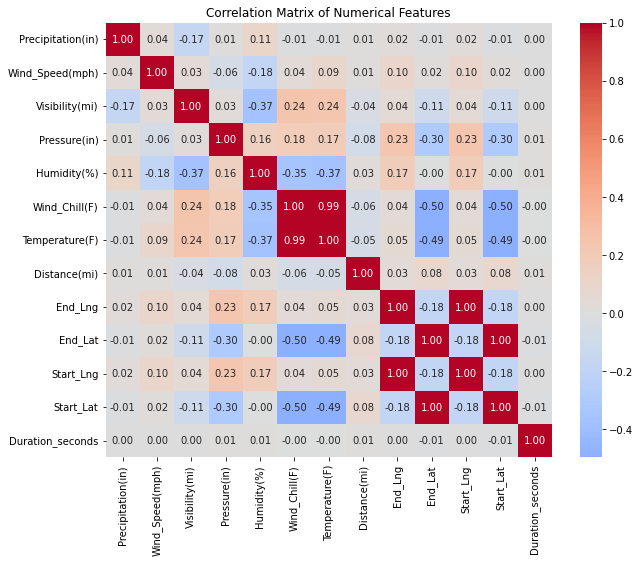

In [19]:
X_num = df[numerical_cols]

# calculate correlation matrix
corr_matrix = np.corrcoef(X_num, rowvar=False)

# plot heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            xticklabels=numerical_cols, yticklabels=numerical_cols, ax=ax)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

I can see that "Start_Lat" and "End_Lat" are highly correlated and "Start_Lng" and "End_Lng" so I'll remove the "End_Lng" and "End_Lat" featured. Also, the features "Wind_chill" and "Temperature" are highly correlated, so I'll remove "Wind_chill".

In [20]:
df.drop(['Wind_Chill(F)', 'End_Lat', 'End_Lng'], axis=1, inplace=True)

Now, I will apply classification models to predict the severity of the accident. One can notice from the graph below that our data is imbalanced. Applying some manipulations to the dataset to solve this problem is essential. If I keep using the dataset as it is, I'll get a strong overfitting on the majority class. This will give me good accuracy because a very high percentage of the training and test data is classified as Severity = 2, so the models will be strongly biased toward the majority class. There are some methods that can be used for such datasets. I choose to use Random undersampling. This method can be the right choice for huge datasets like this. 

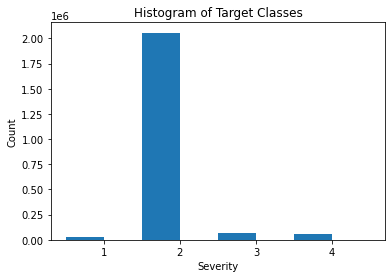

In [21]:
# Separate the target variable (y) from the feature variables (X)
# drop the target column from the feature variables
X = df.drop('Severity', axis=1)  
y = df['Severity']  # select only the target column

# Add histogram of target classes
bin_edges = np.arange(0.5, 5.5, 1)

# Add histogram of target classes
plt.hist(y, width=0.5, bins=bin_edges)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4])
plt.title('Histogram of Target Classes')
plt.show()

Here I split the data into train and test sets, and apply under-sampling using RandomUnderSampler from imblearn.under_sampling and plot the new histogram. Notice that I applied the Undersampling only on the train set. The reason is that I want the test set to be imbalanced, i.e., not manipulated and independent. This will show the natural ability of the models.  

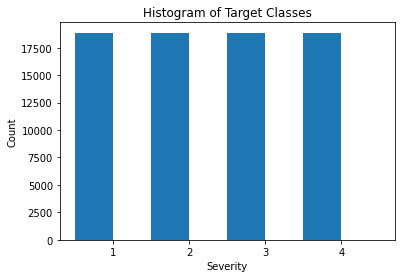

In [59]:
# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the training set
X_train_resampled, y_train_resampled = rus.fit_resample(
    X_train, y_train)

bin_edges = np.arange(0.5, 5.5, 1)

# Add histogram of target classes
plt.hist(y_train_resampled, width=0.5, bins=bin_edges)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4])
plt.title('Histogram of Target Classes')
plt.show()

In the next step, I explored the importance of features in my dataset. Since my dataset contains a mix of numerical and categorical features, the best way to check feature importance is by using tree-based methods. Here, I use RandomForestClassifier. From the graph, we can see that the most important features are Duration seconds and Distance(mi). This makes sense because these features are very related intuitively to the definition of accident severity.

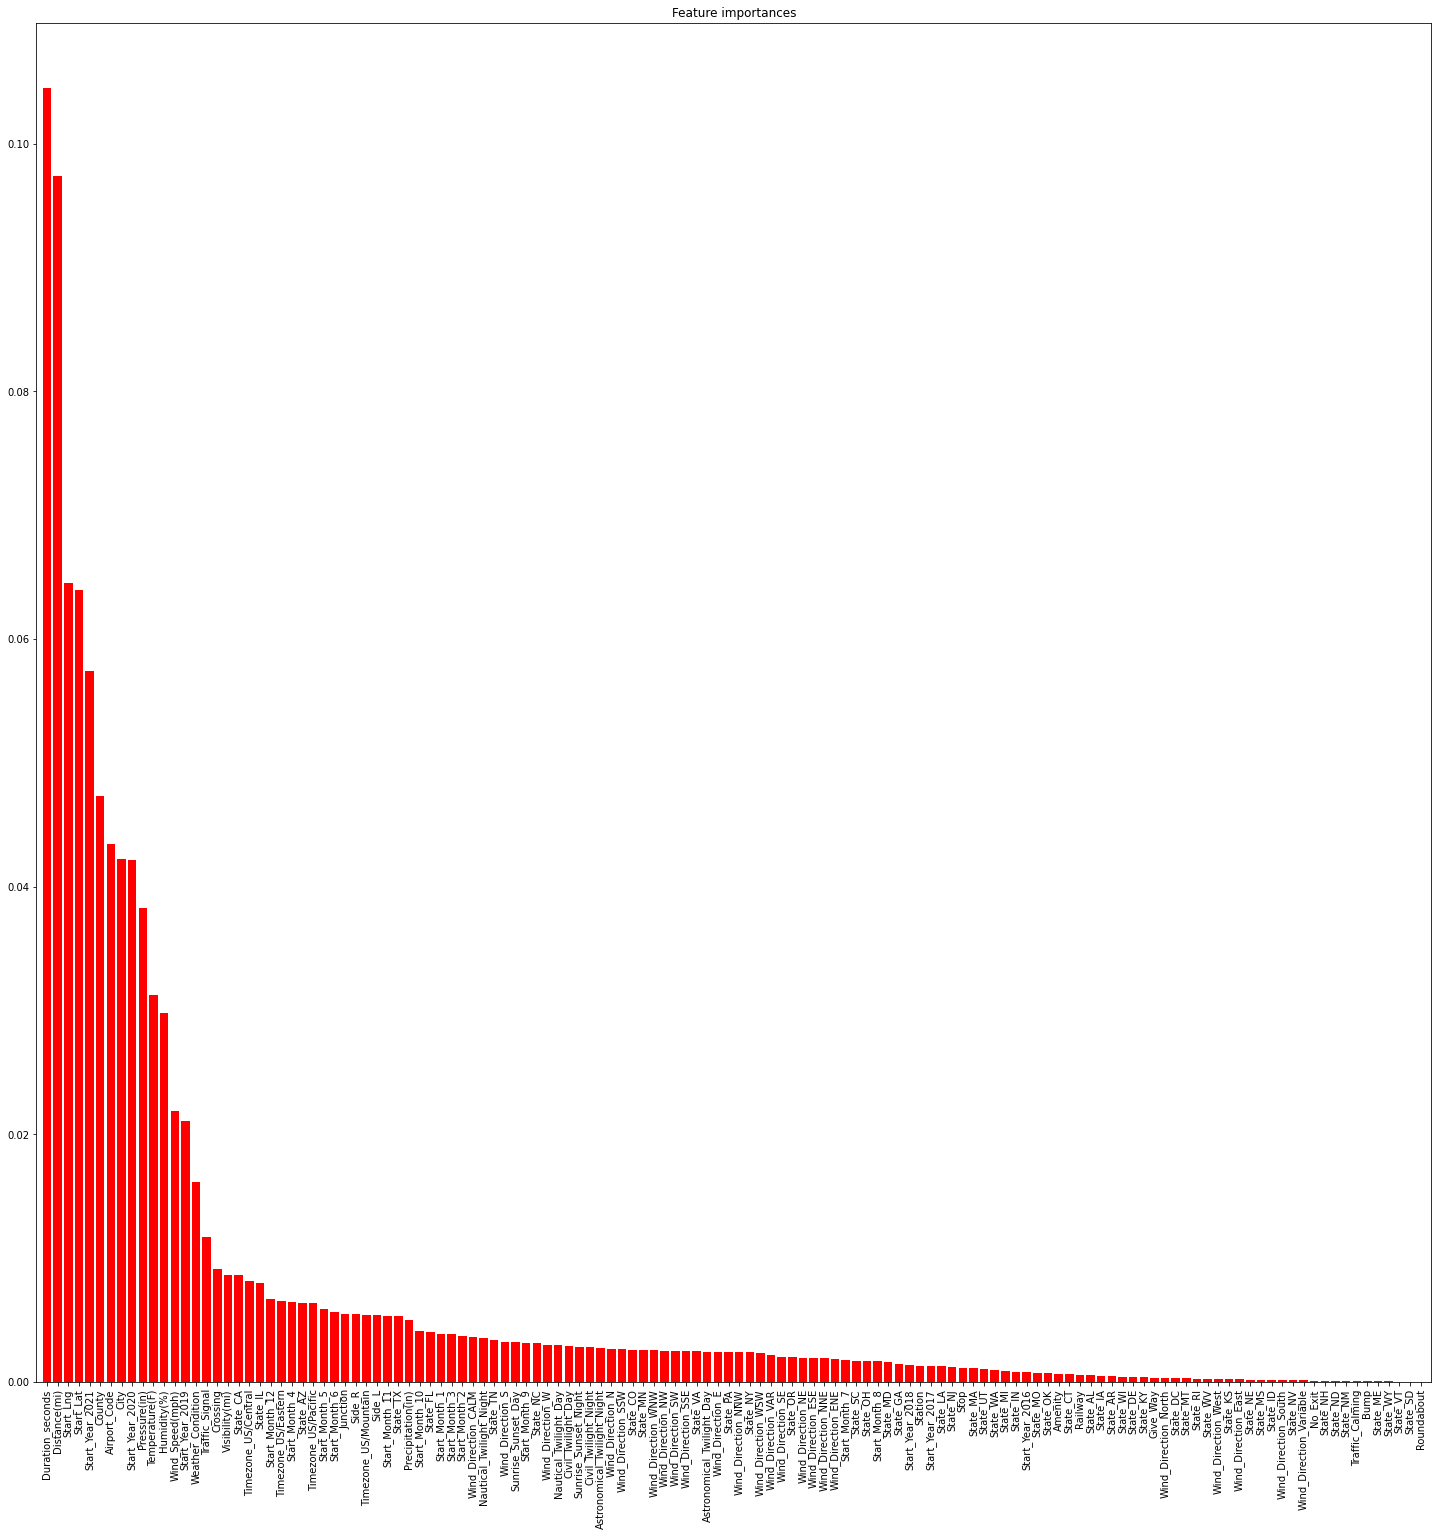

In [60]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(25, 25))
plt.title("Feature importances")
plt.bar(range(X_train_resampled.shape[1]), importances[
    indices], color="r", align="center")
plt.xticks(range(X_train_resampled.shape[1]), list(X_train.columns[
    indices]), rotation=90)
plt.xlim([-1, X_train_resampled.shape[1]])
plt.show()

I choose to take the top 115 most important features for the analysis.

In [55]:
# select only the top 50 important features
X_train_resampled_top115 = X_train_resampled.iloc[:, indices[:115]]
X_test_top115 = X_test.iloc[:, indices[:115]]

Now, I train a Decision tree and check its performance by plotting the confusion matrix. Also, I plot the top 10 most important features and plot the tree up to depth 2(because the tree is too large).

Accuracy: 0.802861407915988


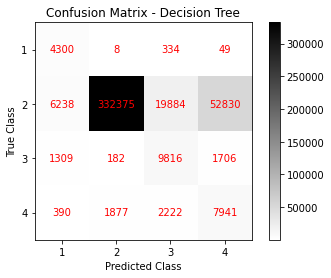

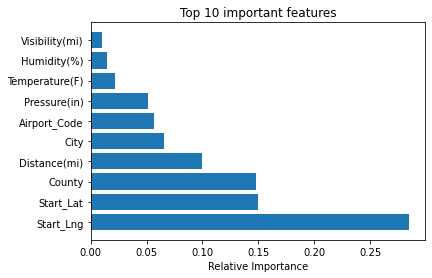

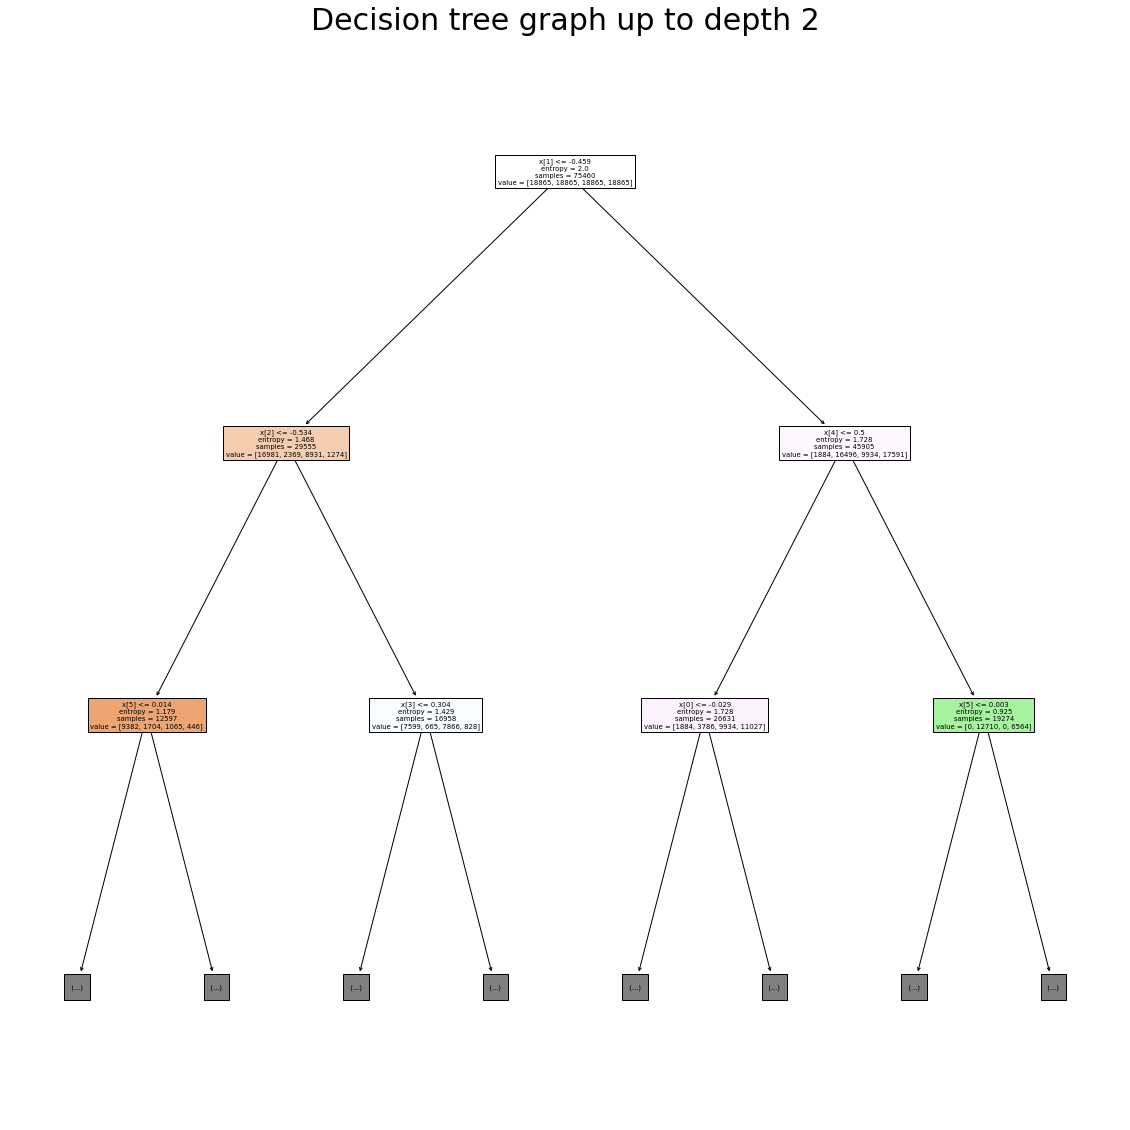

In [34]:
clf = DecisionTreeClassifier(max_depth=100, min_samples_split=100,
                             min_samples_leaf=10,
                             criterion='entropy', random_state=42)
clf.fit(X_train_resampled_top115, y_train_resampled)
y_pred = clf.predict(X_test_top115)
print("Accuracy:", accuracy_score(y_test, y_pred))

precision_DT = precision_score(y_test, y_pred, average=None)
recall_DT = recall_score(y_test, y_pred, average=None)
f1_DT = f1_score(y_test, y_pred, average=None)
accuracy_DT = accuracy_score(y_test, y_pred)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show the top 10 important features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10

classes = ["1", "2", "3", "4"]

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='binary', interpolation='None')
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Loop over data dimensions and create text annotations.
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j], ha="center",
                       va="center", color="red")

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar(im)
plt.show()

# Plot the feature importances with corresponding feature names
plt.barh(range(len(indices[:top_n])),
         importances[indices[:top_n]], align='center')
plt.yticks(range(len(indices[:top_n])),
           [X_train.columns[i] for i in indices[:top_n]])
plt.xlabel('Relative Importance')
plt.title('Top {} important features'.format(top_n))
plt.show()

from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(clf, filled=True, max_depth=2)
plt.title("Decision tree graph up to depth 2", fontsize=30)
plt.show()

I got a result of accuracy = 0.803. This is not a perfect result, but it is important to notice from the confusion matrix that the bias to the majority class is reduced. This is the most important thing, in my opinion, and maybe with more manipulations, it is possible to increase the accuracy.

Now I use ANN. First, I transform the target vectors into one hot encoding format. Next, I defined a function called "create_model" that takes as input the number of hidden layers and the number of neurons in the hidden layers. Then, I used RandomizedSearchCV to find the optimal hyperparameters inside the hyperparameter space param_dist, and with the optimal hyperparameters, I trained the model I created using the "create_model" with these optimal hyperparameters. In the next step, I plot the cost of the validation and the test sets with respect to the number of epochs, i.e., the number of back-forward propagation cycles. I defined an early_stop function with patients=10 (I'ts because I saw that the validation graph is not perfectly smooth). I fitted the model again and applied this function as a callback so the process would stop when the validation cost started to decrease. One can compare the chosen number of epochs with the graph.
Finally, I trained the model and printed the performance's accuracy and confusion matrix on the test set. Also, I plotted the histogram of the weights on the input layer. All the other parameters in the code, for example, learning_rate, activation, and so on chosen after trying different options. The dimension of the output layer in the create_model function is the number of classes, and the input is the number of features.

2359/2359 [==============================] - 46s 18ms/step - loss: 0.7634 - accuracy: 0.6740
Best hyperparameters:  {'num_layers': 3, 'num_neurons': 202}
Epoch 1/60
266/266 [==============================] - 12s 29ms/step - loss: 0.8193 - accuracy: 0.6674 - val_loss: 1.4927 - val_accuracy: 0.2297
Epoch 2/60
266/266 [==============================] - 7s 27ms/step - loss: 0.6822 - accuracy: 0.7228 - val_loss: 1.3525 - val_accuracy: 0.2811
Epoch 3/60
266/266 [==============================] - 6s 24ms/step - loss: 0.6605 - accuracy: 0.7312 - val_loss: 1.3133 - val_accuracy: 0.3057
Epoch 4/60
266/266 [==============================] - 7s 27ms/step - loss: 0.6466 - accuracy: 0.7382 - val_loss: 1.2383 - val_accuracy: 0.3427
Epoch 5/60
266/266 [==============================] - 9s 33ms/step - loss: 0.6340 - accuracy: 0.7447 - val_loss: 1.1830 - val_accuracy: 0.3895
Epoch 6/60
266/266 [==============================] - 2s 9ms/step - loss: 0.6239 - accuracy: 0.7503 - val_loss: 1.2199 - val_accur

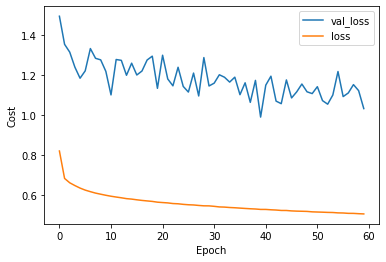

Epoch 1/60
266/266 [==============================] - 7s 27ms/step - loss: 0.5039 - accuracy: 0.7992 - val_loss: 1.0820 - val_accuracy: 0.4640
Epoch 2/60
266/266 [==============================] - 5s 20ms/step - loss: 0.5021 - accuracy: 0.7998 - val_loss: 1.1878 - val_accuracy: 0.4155
Epoch 3/60
266/266 [==============================] - 5s 20ms/step - loss: 0.5017 - accuracy: 0.7997 - val_loss: 1.1154 - val_accuracy: 0.4559
Epoch 4/60
266/266 [==============================] - 5s 20ms/step - loss: 0.5013 - accuracy: 0.8003 - val_loss: 1.0690 - val_accuracy: 0.4799
Epoch 5/60
266/266 [==============================] - 12s 47ms/step - loss: 0.5002 - accuracy: 0.8015 - val_loss: 1.0632 - val_accuracy: 0.4883
Epoch 6/60
266/266 [==============================] - 20s 75ms/step - loss: 0.4996 - accuracy: 0.8013 - val_loss: 1.1786 - val_accuracy: 0.4393
Epoch 7/60
266/266 [==============================] - 22s 82ms/step - loss: 0.4983 - accuracy: 0.8016 - val_loss: 1.1558 - val_accuracy: 0.4

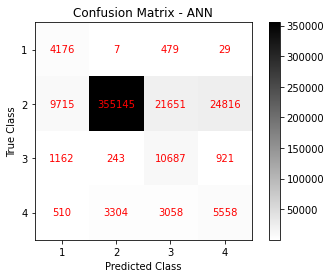

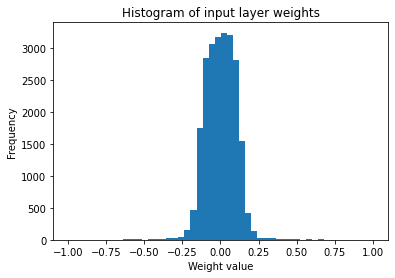

In [56]:
# create LabelEncoder object
le = LabelEncoder()

# fit and transform y_train_resampled
y_train_resampled = le.fit_transform(y_train_resampled)

# transform y_test
y_test = le.transform(y_test)

# Convert integer labels to one-hot encoded format
num_classes = len(np.unique(y_train_resampled))
y_train_resampled = to_categorical(y_train_resampled, num_classes)
y_test = to_categorical(y_test, num_classes)
y_test_labels = np.argmax(y_test, axis=1)
input_dimention=X_train_resampled_top115.shape[1]

# Define the model architecture
def create_model(num_layers, num_neurons):
    model = keras.Sequential()
    model.add(keras.layers.Dense(num_neurons,
                                 activation='tanh',
                                 input_dim=input_dimention))
    for i in range(num_layers):
        model.add(keras.layers.Dense(num_neurons, activation='tanh'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the hyperparameter space
param_dist = {"num_layers": sp_randint(1, 4),
              "num_neurons": sp_randint(50, 300)}

# Create the Keras classifier object
clf = KerasClassifier(build_fn=create_model)

# Perform the random search over the hyperparameter space
random_search = RandomizedSearchCV(clf,
                                   param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1)
random_search.fit(X_train_resampled_top115, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

# Train the model with the best parameters on the training set
model = create_model(**random_search.best_params_)

early_stop = EarlyStopping(patience=10, monitor='val_loss')  # Define early stopping
                     
history = model.fit(X_train_resampled_top115,
                    y_train_resampled, epochs=60,
                    batch_size=256, validation_split=0.1)

# Plot the validation and training cost
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Add the early_stop at callbacks to stop the process
#with the optimal number of epochs
history = model.fit(X_train_resampled_top115,
                    y_train_resampled, epochs=60, 
                    batch_size=256, validation_split=0.1,
                    callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_top115, y_test)
print('Test accuracy:', test_accuracy)

# Get the predicted classes for the test set
y_pred = model.predict(X_test_top115)

# Convert the predicted classes into labels
y_pred = np.argmax(y_pred, axis=1)

# Convert the test labels into multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)

precision_ANN = precision_score(y_test_multiclass,
                                y_pred, average=None)
recall_ANN = recall_score(y_test_multiclass, y_pred, average=None)
f1_ANN = f1_score(y_test_multiclass, y_pred, average=None)
accuracy_ANN = accuracy_score(y_test_multiclass, y_pred)

# Print the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

classes = ["1", "2", "3", "4"]

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='binary', interpolation='None')
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Loop over data dimensions and create text annotations.
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j], ha="center",
                       va="center", color="red")

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - ANN')
plt.colorbar(im)
plt.show()

# Get the weights of the input layer
weights = model.get_weights()[0]

# Plot the histogram of the weights
plt.hist(weights.flatten(), bins=50)
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.title('Histogram of input layer weights')
plt.show()

I got accuracy 0.85

Test accuracy: 0.7773529258530198


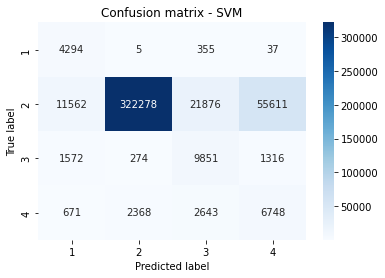

In [32]:
# Fit the SVM model
svm_model = SVC(C=1000, kernel='poly', degree=3, gamma='auto')
svm_model.fit(X_train_resampled_top115, y_train_resampled)

# Evaluate the model on the test set
test_accuracy = svm_model.score(X_test_top115, y_test)
print('Test accuracy:', test_accuracy)

# Predict on the test set
y_pred = svm_model.predict(X_test_top115)

precision_SVM = precision_score(y_test, y_pred, average=None)
recall_SVM = recall_score(y_test, y_pred, average=None)
f1_SVM = f1_score(y_test, y_pred, average=None)
accuracy_SVM = accuracy_score(y_test, y_pred)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with custom labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["1", "2", "3", "4"],
            yticklabels=["1", "2", "3", "4"])
plt.title('Confusion matrix - SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Simarly, apply Logistic Regression.

Test accuracy: 0.7534708615257066


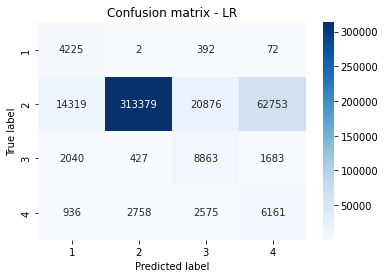

In [61]:
# Initialize the logistic regression object
lr = LogisticRegression(C=1000, solver='liblinear', penalty='l1')

# Fit the model on the training data
lr.fit(X_train_resampled_top115, y_train_resampled)

# Predict the classes for the test set
y_pred = lr.predict(X_test_top115)

precision_LR = precision_score(y_test, y_pred, average=None)
recall_LR = recall_score(y_test, y_pred, average=None)
f1_LR = f1_score(y_test, y_pred, average=None)
accuracy_LR = accuracy_score(y_test, y_pred)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["1", "2", "3", "4"],
            yticklabels=["1", "2", "3", "4"])
plt.title('Confusion matrix - LR')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

A table that compares all the preformances.

In [62]:
# Define the classification metrics for each model
metrics_DT = [accuracy_DT, precision_DT, recall_DT, f1_DT]
metrics_ANN = [accuracy_ANN, precision_ANN, recall_ANN, f1_ANN]
metrics_SVM = [accuracy_SVM, precision_SVM, recall_SVM, f1_SVM]
metrics_LR = [accuracy_LR, precision_LR, recall_LR, f1_LR]

# Create a DataFrame with the classification metrics
df_metrics = pd.DataFrame({'Decision Tree': metrics_DT, 'ANN': metrics_ANN,
                           'SVM': metrics_SVM, 'LR': metrics_LR},
                          index=['Accuracy', 'Precision',
                                 'Recall', 'F1-Score'])

# Format the DataFrame to have a bold header row
df_metrics_styled = df_metrics.style.set_table_styles([{'selector': 'th',
                                                        'props': [(
                                                            'font-weight',
                                                            'bold')]}])

# Display the styled DataFrame
df_metrics_styled

,Decision Tree,ANN,SVM,LR
Accuracy,0.802861,0.850734,0.777353,0.753471
Precision,[0.35139332 0.99381956 0.30431548 0.12700317],[0.26832873 0.99009197 0.29789547 0.17743583],[0.23725068 0.9918535 0.28368611 0.10591411],[0.196329 0.98993259 0.27099003 0.08718108]
Recall,[0.9166489 0.80805539 0.7543226 0.6388576 ],[0.89021531 0.86341281 0.82125567 0.44714401],[0.91536986 0.78350801 0.75701222 0.54288013],[0.90066084 0.76187316 0.68108814 0.49565567]
F1-Score,[0.50803403 0.8913618 0.43367426 0.21188431],[0.41236299 0.9224234 0.4372034 0.25405677],[0.37683194 0.87545569 0.41271105 0.17724777],[0.32238373 0.86105788 0.38771627 0.14828097]


## Conclusions
In this section, I'll explain my conclusion using the table above. If we look at the accuracy of the models, the ANN is the best, and the Decision Tree is the second best. If we look at all the statistical quantities, we can see that, for example, the variance of the recall values of the Decision Tree is smaller than the other models. The meaning is it can classify better the extreme cases, i.e., the accidents with high severity, if I need to develop a classification ML model for this task. In that case, I maybe choose some combination of ANN and Decision tree because they have advantages and disadvantages against each other. The Logistic regression and SVM are performing a little bit worse, in my opinion. Maybe It's because these algorithms are more natural for binary classification problems, which is their origin. In multiclass problems, we use generalizations of these models. In contrast, ANN and decision trees can solve multiclass problems naturally.